## Value iteration algorithm

This jupyter notebook is an attempt to solve 
value iteration algorithm assignment of week 2 for [OpenAI](https://gym.openai.com/) gym frozen lake environment.

The solution is inspired by course [Move37](https://www.theschool.ai/courses/move-37-course/) of TheSchoolOfAi,
Siraj Raval and Colin Scow.



In [266]:
import gym
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [357]:
env = gym.make("FrozenLake8x8-v0")
env.reset()
env.render()
print("S:Start, F: Frozen, H: Hole, G: Goal")


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
S:Start, F: Frozen, H: Hole, G: Goal


In [358]:
"""
For each state in S
v(s) is equal to 
the total reward and next state value, by the most promising policy"""
        
def render(array):
    return False


def value_update_cycle(num_States, num_Actions, value_map, gamma, env):
    """Function to update the value_map belonging to the environment"""
    policy_reward = numpy.zeros(num_Actions)
    value_new = numpy.zeros(num_States)
    policy_new = numpy.zeros(num_States)
    
    for state_iterator in range(num_States):
        policy_reward*=0
        for action_iterator in range(num_Actions):        
            for (transition_probability,transition_state,reward,done) in env.env.P[state_iterator][action_iterator]:
                policy_reward[action_iterator]+=transition_probability * (gamma * value_map[transition_state] + reward)
        value_new[state_iterator]  = max(policy_reward)
        
        policy_new[state_iterator] = numpy.argmax(policy_reward)
    return (value_new, policy_new)

def value_iteration(env, gamma=0.99,epsilon=0.0001, max_count = 50000, render = False):
    """
    Wrapper function for the value update function, 
    update the value map, until count reaches limit,
    or if resulting change is miniscule"""
    num_States = env.env.nS
    num_Actions = env.env.nA
    
    value_old = numpy.zeros(num_States)
    value_new = numpy.zeros(num_States)
    policy_old = numpy.zeros(num_States)
    policy_new = numpy.zeros(num_States)
    delta = [1]
    count=0
    while (delta[-1] > epsilon and count < max_count):
        count+=1
        value_new=value_old
        (value_new, policy_new) = value_update_cycle(num_States, num_Actions, value_new, gamma, env)
        delta.append(max(abs(value_new-value_old)))
        value_old = value_new
        policy_old = policy_new
        if (render and (count % 1 == 0)):
            render(value_old)
            
    return (value_old, policy_old, count, delta)

def test_policy(policy, env):
    """ A wrapper function to test out the resulting policy"""
    start = env.reset()
    done = False
    obs = start
    path =[start]
    while not done:
        (obs, reward, done, info) = env.step(policy[obs])
        path.append(obs)
    
    return(path, reward)

def test_multiple_times(policy, env, test_count=5000):
    """A function to test the success rate of the policy"""
    rewards = []
    number_of_steps = []
    
    for i in range(test_count):
        (path, reward) = test_policy(policy, env)
        rewards.append(reward)
        number_of_steps.append(len(path))
    return (rewards, number_of_steps)


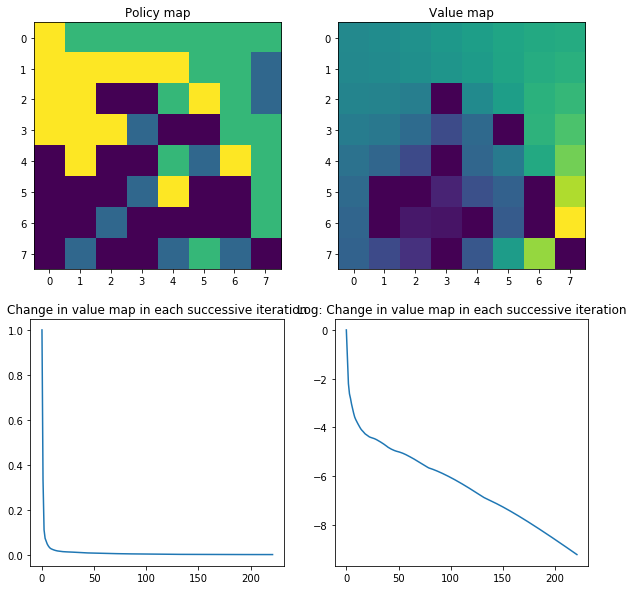

In [271]:
env.reset()
(value_map, policy_map , count, delta) = value_iteration(env)
figure,axes = plt.subplots(2,2,figsize=[10,10])

axes[0,0].set_title("Policy map")
axes[0,0].imshow(numpy.reshape(policy_map,[8,8]))

axes[0,1].set_title("Value map")
axes[0,1].imshow(numpy.reshape(value_map,[8,8]))

axes[1,0].set_title("Change in value map in each successive iteration")
axes[1,0].plot(delta)

axes[1,1].set_title("Log: Change in value map in each successive iteration")
axes[1,1].plot(numpy.log(delta))


plt.show()

Number of steps to reach goal:  87


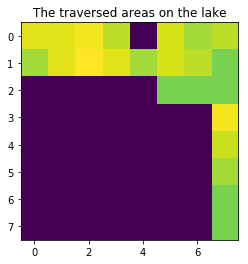

In [306]:
"""
See details of policy traversed a single time"""
(path, reward) = test_policy(policy_map, env)
print("Number of steps to reach goal: ", len(path))
story = numpy.ones([8,8])/10000
for element in path:
    story[element//8, element %8]+=1
    
plt.imshow(numpy.log(story**2))
plt.title("The traversed areas on the lake")
plt.show()

In [313]:
"""Test the policy for the success rate"""
(rewards, stepnumbers) = test_multiple_times(policy_map, env)


Number of iterations:  5000
Number of successful iterations:  4298.0
Success rate:  85.96000000000001


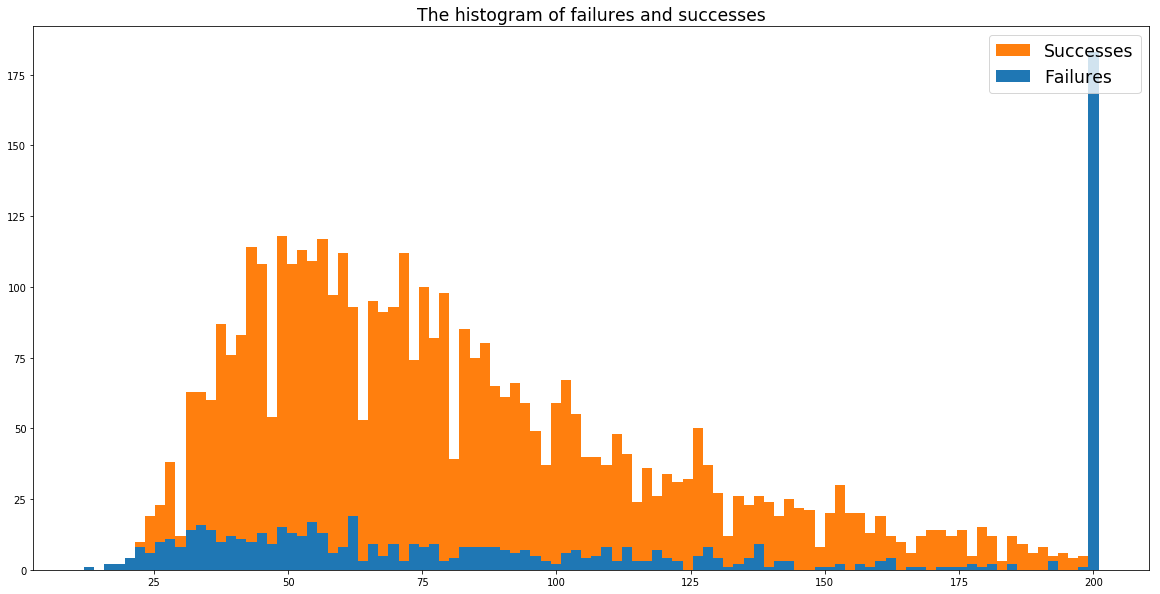

In [355]:
print("Number of iterations: ", len(rewards))
print("Number of successful iterations: ", sum(rewards))
print("Success rate: ", sum(rewards)/len(rewards)*100)

successes  = [stepnumbers[i] for i in range(len(rewards)) if rewards[i]==1.0]
failures = [stepnumbers[i] for i in range(len(rewards)) if rewards[i]==0.0]

plt.figure(figsize=[20,10])
plt.hist([failures, successes],bins=100, histtype="stepfilled")
plt.title("The histogram of failures and successes", fontsize="xx-large")
plt.legend(("Successes", "Failures" ), fontsize="xx-large")

plt.show()